In [ ]:
# Deep Learning with PyTorch: Zero to GANs

In [1]:
import torch
import numpy as np

## Autograd Feature

In [3]:
# understanding autograd (1/2)

# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

# Arithmetic operation
y = w * x + b 
y

tensor(17., grad_fn=<AddBackward0>)

In [4]:
# understanding autograd (2/2)

# To compute derivatives
y.backward()

# Display gradients
print('dy/dx:', x.grad) # because we didn't set requires_grad = true
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


## Linear Regression in Pytorch

In [5]:
# Linear Regression (1/8)

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

# Randomly initialize weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-1.9520,  0.9178, -0.7273],
        [-0.4591,  0.6602, -0.3299]], requires_grad=True)
tensor([ 1.1786, -0.8726], requires_grad=True)


In [11]:
# Linear Regression (2/8)

# we will perform: X x Transposed(W) + B

def model(x):
    return x @ w.t() + b

# Generate predictions
preds = model(inputs)
print('Predictions:',preds)
print('Targets:',targets)

# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

# Compute loss
loss = mse(preds, targets)
print('loss:',loss)

Predictions: tensor([[ -82.2869,    9.2388],
        [-104.3973,   12.1847],
        [ -43.3831,   49.6040],
        [-156.4236,  -18.0168],
        [ -60.1853,   24.8644]], grad_fn=<AddBackward0>)
Targets: tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
loss: tensor(16875.1484, grad_fn=<DivBackward0>)


In [12]:
# Linear Regression (3/8)

# understand the role of gradients in reducing loss

# Compute gradients
loss.backward()

# Gradients for weights
print(w)
print(w.grad)

with torch.no_grad(): # signals pytorch to ignore computing gradients
    w -= w.grad * 1e-5 # 1e-5 is Learning rate
    b -= b.grad * 1e-5
    
loss = mse(preds, targets) 
print('new loss:',loss)

w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[-1.7812,  1.0910, -0.6171],
        [-0.3813,  0.7442, -0.2771]], requires_grad=True)
tensor([[-14110.4863, -14135.5068,  -9050.9277],
        [ -6376.0552,  -6892.9087,  -4351.7974]])
new loss: tensor(16875.1484, grad_fn=<DivBackward0>)
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [17]:
# Linear Regression (4/8)

# now, putting everything together
# Train for 100 epochs
for i in range(150):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()
        
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print('loss',loss) # Squared loss is 62, real loss is sqrt of this = ~8

# Predictions
print(preds)

# Targets
print(targets)

print(model(torch.Tensor([45, 65, 92]))) # using the trained model to predict

loss tensor(31.5303, grad_fn=<DivBackward0>)
tensor([[ 57.6246,  70.6599],
        [ 78.1743,  96.6930],
        [127.1296, 141.4369],
        [ 22.1513,  39.4722],
        [ 94.5166, 110.6143]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
tensor([72.9877, 91.5663], grad_fn=<AddBackward0>)


In [18]:
# Linear Regression (5/8)

# using built in functions in pytorch

import torch.nn as nn
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [20]:
# Linear Regression (6/8)

from torch.utils.data import TensorDataset
train_ds = TensorDataset(inputs, targets)
print(train_ds[0:3]) # shows first three inputs and outputs

from torch.utils.data import DataLoader
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# to see what is in train_dl

for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

(tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.]]))
tensor([[ 68.,  96.,  71.],
        [ 69.,  96.,  70.],
        [ 73.,  66.,  44.],
        [ 88., 134.,  59.],
        [ 91.,  88.,  64.]])
tensor([[104., 118.],
        [103., 119.],
        [ 57.,  69.],
        [118., 132.],
        [ 81., 101.]])


In [21]:
# Linear Regression (7/8)

# instead of initializing the weights & biases manually using the nn.Linear

# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

# Parameters
list(model.parameters())

# Generate predictions
preds = model(inputs)
print('predictions',preds)

# Import nn.functional for using built in loss functon
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

loss = loss_fn(model(inputs), targets)
print(loss)

# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Parameter containing:
tensor([[-0.3974,  0.0260, -0.5769],
        [-0.0488, -0.0995, -0.0437]], requires_grad=True)
Parameter containing:
tensor([ 0.5328, -0.2860], requires_grad=True)
predictions tensor([[-51.5439, -12.3929],
        [-70.2664, -16.2785],
        [-64.0177, -20.3978],
        [-60.2332, -11.1572],
        [-64.7758, -16.2637],
        [-51.9674, -12.3422],
        [-70.8693, -16.2227],
        [-64.9921, -20.4903],
        [-59.8097, -11.2079],
        [-64.9552, -16.2586],
        [-52.1468, -12.3371],
        [-70.6899, -16.2277],
        [-63.4148, -20.4536],
        [-60.0537, -11.1622],
        [-64.3523, -16.3144]], grad_fn=<AddmmBackward>)
tensor(16741.0977, grad_fn=<MseLossBackward>)


In [23]:
# Linear Regression (8/8)

# Utility function to train the model

def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
            

fit(100, model, loss_fn, opt, train_dl)

# Generate predictions
preds = model(inputs)
print('predictions',preds)
print('targets',targets)

Epoch [10/100], Loss: 29.5932
Epoch [20/100], Loss: 44.9392
Epoch [30/100], Loss: 29.8473
Epoch [40/100], Loss: 17.0056
Epoch [50/100], Loss: 36.6529
Epoch [60/100], Loss: 30.2027
Epoch [70/100], Loss: 20.4752
Epoch [80/100], Loss: 23.2923
Epoch [90/100], Loss: 18.8860
Epoch [100/100], Loss: 19.5450
predictions tensor([[ 57.5058,  70.7362],
        [ 78.8171,  98.5265],
        [124.5934, 136.8845],
        [ 23.1758,  39.7365],
        [ 94.9987, 113.7835],
        [ 56.2040,  69.6378],
        [ 78.0793,  98.2347],
        [124.5617, 137.2839],
        [ 24.4776,  40.8350],
        [ 95.5628, 114.5902],
        [ 56.7680,  70.4445],
        [ 77.5153,  97.4280],
        [125.3311, 137.1763],
        [ 22.6117,  38.9298],
        [ 96.3006, 114.8820]], grad_fn=<AddmmBackward>)
targets tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
     

## Working with Image Data

In [33]:
# Using MNIST data

import torch
import torchvision
from torchvision.datasets import MNIST

# Download training dataset
dataset = MNIST(root='data/', download=False) 

print(len(dataset))

test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

60000
10000


Label: 5


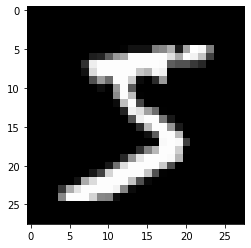

In [34]:
dataset[0]

import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [52]:
import torchvision.transforms as transforms # to convert image to tensors

dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [53]:
# Train and Validation Split

from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
print(len(train_ds))
print(len(val_ds))

from torch.utils.data import DataLoader
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

50000
10000


In [54]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

# nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is
# flattened into a vector of size 784 

print(model.weight.shape)
print(model.weight)

print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0299,  0.0305,  0.0102,  ...,  0.0009, -0.0175,  0.0342],
        [-0.0096, -0.0355,  0.0194,  ...,  0.0127,  0.0013,  0.0285],
        [-0.0268,  0.0344,  0.0317,  ...,  0.0175,  0.0089,  0.0004],
        ...,
        [ 0.0070,  0.0274, -0.0335,  ...,  0.0163, -0.0164,  0.0166],
        [ 0.0312,  0.0230, -0.0351,  ..., -0.0111, -0.0227,  0.0348],
        [ 0.0134, -0.0024, -0.0048,  ..., -0.0271,  0.0350, -0.0094]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0216,  0.0308, -0.0228,  0.0216, -0.0345,  0.0026, -0.0314,  0.0104,
         0.0068, -0.0084], requires_grad=True)


In [55]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784) # intead of -1 you can use 128 but -1 is generic
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [56]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [57]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0254,  0.0337,  0.0139,  ...,  0.0189, -0.0306, -0.0191],
         [ 0.0063, -0.0148,  0.0135,  ..., -0.0268, -0.0272, -0.0063],
         [ 0.0327,  0.0232, -0.0292,  ..., -0.0004,  0.0352, -0.0194],
         ...,
         [-0.0005,  0.0254, -0.0258,  ..., -0.0029,  0.0275,  0.0077],
         [ 0.0244,  0.0034, -0.0069,  ...,  0.0306,  0.0274,  0.0209],
         [ 0.0227,  0.0028, -0.0014,  ...,  0.0053, -0.0328,  0.0186]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0104,  0.0138, -0.0092, -0.0269, -0.0177,  0.0279, -0.0325,  0.0264,
          0.0263,  0.0001], requires_grad=True)]

In [58]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0573,  0.2162, -0.0186,  0.1319, -0.1342, -0.0178,  0.1091,  0.1644,
         -0.0627,  0.0304],
        [ 0.0830,  0.2585, -0.0521, -0.0387, -0.0870, -0.1552, -0.0264, -0.0101,
          0.1677, -0.1304]])


In [59]:
# What softmax does raises e to the power of observation and divides it by the sum of all 
# such values for a prediction

import torch.nn.functional as F
outputs[:2]

tensor([[ 0.0573,  0.2162, -0.0186,  0.1319, -0.1342, -0.0178,  0.1091,  0.1644,
         -0.0627,  0.0304],
        [ 0.0830,  0.2585, -0.0521, -0.0387, -0.0870, -0.1552, -0.0264, -0.0101,
          0.1677, -0.1304]], grad_fn=<SliceBackward>)

In [60]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1) # specify dimension along which the function should be applied
print("Sample probabilities:\n", probs[:2].data)


Sample probabilities:
 tensor([[0.1004, 0.1177, 0.0931, 0.1082, 0.0829, 0.0932, 0.1058, 0.1118, 0.0891,
         0.0978],
        [0.1077, 0.1283, 0.0941, 0.0953, 0.0909, 0.0849, 0.0965, 0.0981, 0.1172,
         0.0870]])


In [61]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 1, 0, 1, 1, 0, 0, 1, 8, 1, 1, 1, 1, 8, 5, 3, 1, 0, 8, 2, 1, 3, 4, 8,
        2, 0, 0, 8, 1, 0, 0, 1, 3, 0, 2, 2, 1, 2, 0, 4, 0, 0, 0, 2, 2, 5, 2, 1,
        0, 1, 8, 0, 2, 0, 0, 3, 4, 0, 2, 1, 1, 8, 1, 8, 1, 2, 1, 0, 8, 0, 0, 8,
        1, 1, 0, 2, 1, 3, 2, 1, 4, 4, 1, 9, 0, 0, 2, 1, 5, 5, 8, 1, 2, 1, 0, 0,
        8, 8, 0, 0, 1, 2, 0, 2, 0, 3, 8, 0, 8, 1, 4, 2, 8, 4, 3, 2, 0, 4, 1, 9,
        0, 0, 0, 0, 3, 1, 0, 4])
tensor([0.1177, 0.1283, 0.1433, 0.1207, 0.1496, 0.1351, 0.1263, 0.1310, 0.1342,
        0.1159, 0.1189, 0.1301, 0.1993, 0.1083, 0.1161, 0.1393, 0.1356, 0.1363,
        0.1229, 0.1355, 0.1136, 0.1172, 0.1170, 0.1339, 0.1451, 0.1294, 0.1339,
        0.1203, 0.1437, 0.1330, 0.1349, 0.1515, 0.1227, 0.1220, 0.1410, 0.1476,
        0.1442, 0.1221, 0.1291, 0.1189, 0.1188, 0.1444, 0.1299, 0.1168, 0.1246,
        0.1182, 0.1219, 0.1370, 0.1350, 0.1161, 0.1433, 0.1339, 0.1555, 0.1345,
        0.1230, 0.1217, 0.1185, 0.1333, 0.1506, 0.1136, 0.1572, 0.1225, 0.1195,
       

In [62]:
labels

tensor([7, 5, 9, 3, 7, 9, 9, 3, 0, 1, 6, 2, 6, 4, 1, 3, 1, 4, 5, 5, 1, 4, 3, 6,
        6, 7, 9, 6, 2, 5, 2, 2, 4, 3, 0, 0, 6, 5, 7, 7, 1, 8, 5, 3, 8, 1, 0, 2,
        9, 7, 2, 0, 0, 0, 9, 6, 1, 7, 0, 4, 0, 2, 1, 5, 6, 5, 1, 4, 1, 3, 3, 3,
        6, 2, 8, 0, 7, 3, 3, 2, 0, 3, 4, 2, 8, 7, 5, 2, 1, 4, 0, 4, 0, 7, 5, 1,
        1, 3, 9, 2, 0, 0, 9, 5, 5, 3, 6, 7, 4, 7, 3, 2, 3, 3, 4, 0, 8, 9, 2, 2,
        4, 7, 9, 3, 2, 6, 7, 3])

In [63]:
torch.sum(preds == labels) 

tensor(11)

In [64]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

accuracy(outputs, labels)

tensor(0.0859)

In [65]:
# Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use
# it as a loss function for optimizing our model because:
# 1. It's not a differentiable function (torch.max and == are both non-continuous)
# 2.  doesn't take into account the actual probabilities predicted by the model
# we ue cross entropy instead 

# For each output row, pick the predicted probability for the correct label
# if the predicted probabilities re [0.1, 0.3, 0.2, ...] and the correct label is 1, pick 0.3
# Then, take the logarithm of the picked probability
#  If the probability is high, i.e., close to 1, then its logarithm is a very small negative value
# And if the probability is low (close to 0), then the logarithm is a very large negative value.
# also multiply the result by -1, it gives large postive value of the loss for poor predictions.

# Unlike accuracy, cross-entropy is a continuous and differentiable function.

outputs

tensor([[ 0.0573,  0.2162, -0.0186,  ...,  0.1644, -0.0627,  0.0304],
        [ 0.0830,  0.2585, -0.0521,  ..., -0.0101,  0.1677, -0.1304],
        [ 0.4987,  0.4534, -0.1353,  ..., -0.3043, -0.0275,  0.0514],
        ...,
        [ 0.0690,  0.3600,  0.0888,  ..., -0.1382, -0.1666, -0.1394],
        [ 0.2120,  0.1177, -0.0741,  ..., -0.0316, -0.0654,  0.0149],
        [ 0.1301,  0.2671,  0.2032,  ..., -0.0735,  0.0695,  0.1584]],
       grad_fn=<AddmmBackward>)

In [66]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs, labels)
print(loss) # lower the loss, The better the model.

tensor(2.3403, grad_fn=<NllLossBackward>)


In [68]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [69]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [70]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [71]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3279037475585938, 'val_acc': 0.10245253145694733}

In [72]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9649, val_acc: 0.5861
Epoch [1], val_loss: 1.6955, val_acc: 0.7228
Epoch [2], val_loss: 1.4933, val_acc: 0.7614
Epoch [3], val_loss: 1.3405, val_acc: 0.7797
Epoch [4], val_loss: 1.2231, val_acc: 0.7933


In [73]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1310, val_acc: 0.8033
Epoch [1], val_loss: 1.0572, val_acc: 0.8105
Epoch [2], val_loss: 0.9969, val_acc: 0.8160
Epoch [3], val_loss: 0.9468, val_acc: 0.8202
Epoch [4], val_loss: 0.9045, val_acc: 0.8244


In [74]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8683, val_acc: 0.8274
Epoch [1], val_loss: 0.8369, val_acc: 0.8317
Epoch [2], val_loss: 0.8094, val_acc: 0.8353
Epoch [3], val_loss: 0.7852, val_acc: 0.8371
Epoch [4], val_loss: 0.7636, val_acc: 0.8396


In [75]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7442, val_acc: 0.8418
Epoch [1], val_loss: 0.7268, val_acc: 0.8438
Epoch [2], val_loss: 0.7109, val_acc: 0.8450
Epoch [3], val_loss: 0.6964, val_acc: 0.8463
Epoch [4], val_loss: 0.6832, val_acc: 0.8468


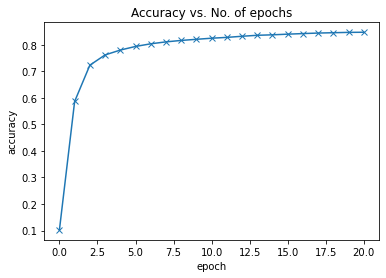

In [76]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Label: 7 , Predicted: 7


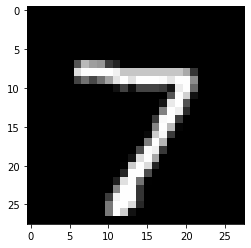

In [77]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


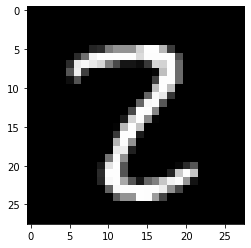

In [79]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [80]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.640444815158844, 'val_acc': 0.863964855670929}

In [81]:
# saving the model using the folliwing 
# torch.save(model.state_dict(), 'mnist-logistic.pth')
# The .state_dict method returns an OrderedDict containing all the weights and 
# bias matrices mapped to the right attributes

model.state_dict() # display

OrderedDict([('linear.weight',
              tensor([[ 0.0346, -0.0096, -0.0247,  ..., -0.0223, -0.0065,  0.0133],
                      [ 0.0078, -0.0252,  0.0003,  ...,  0.0222,  0.0329,  0.0084],
                      [-0.0016,  0.0152, -0.0051,  ...,  0.0115, -0.0262, -0.0073],
                      ...,
                      [-0.0187, -0.0135, -0.0143,  ...,  0.0020,  0.0180, -0.0156],
                      [-0.0213, -0.0058, -0.0115,  ..., -0.0328, -0.0236,  0.0242],
                      [-0.0230, -0.0344,  0.0161,  ..., -0.0239, -0.0227, -0.0077]])),
             ('linear.bias',
              tensor([-0.0780,  0.0813,  0.0116, -0.0020,  0.0584,  0.0426, -0.0121,  0.0296,
                      -0.1038, -0.0345]))])

In [82]:
model2 = MnistModel() # create a new model and 
model2.state_dict() # will conain randomised weights

OrderedDict([('linear.weight',
              tensor([[ 4.9802e-03,  4.9483e-03,  1.2466e-02,  ..., -1.4335e-02,
                       -2.7517e-02, -2.9769e-02],
                      [ 1.8159e-03, -8.4984e-03, -6.7797e-05,  ..., -1.4476e-02,
                       -2.1763e-02, -1.1465e-02],
                      [-1.9808e-02,  2.5512e-02, -5.7722e-03,  ..., -2.2619e-03,
                       -3.2766e-02, -1.1857e-02],
                      ...,
                      [-2.5890e-02, -3.4611e-02,  2.2216e-02,  ..., -9.8193e-03,
                       -2.2909e-03, -6.5510e-03],
                      [-3.5325e-02, -6.3423e-04,  1.7142e-03,  ..., -9.6942e-04,
                        2.6971e-02,  3.0840e-02],
                      [-1.9800e-02,  1.1469e-02,  3.0236e-02,  ...,  3.4387e-02,
                        1.6876e-02, -3.0153e-02]])),
             ('linear.bias',
              tensor([-0.0123, -0.0212, -0.0120,  0.0179, -0.0116, -0.0033, -0.0341, -0.0175,
                      -0.0072,

In [83]:
evaluate(model2, test_loader)

{'val_loss': 2.355764627456665, 'val_acc': 0.06816406548023224}

In [84]:
evaluate(model, test_loader)

{'val_loss': 0.640444815158844, 'val_acc': 0.863964855670929}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
result = evaluate(model2, test_loader)
result

# MNIST USING DEEP LEARNING

In [86]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [89]:
dataset = MNIST(root='data/', download=False, transform=ToTensor())

val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [92]:
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
# pin_memory - allocate the samples in page-locked memory, which speeds-up the transfer.
# num_workers - for parallelization

images.shape: torch.Size([128, 1, 28, 28])


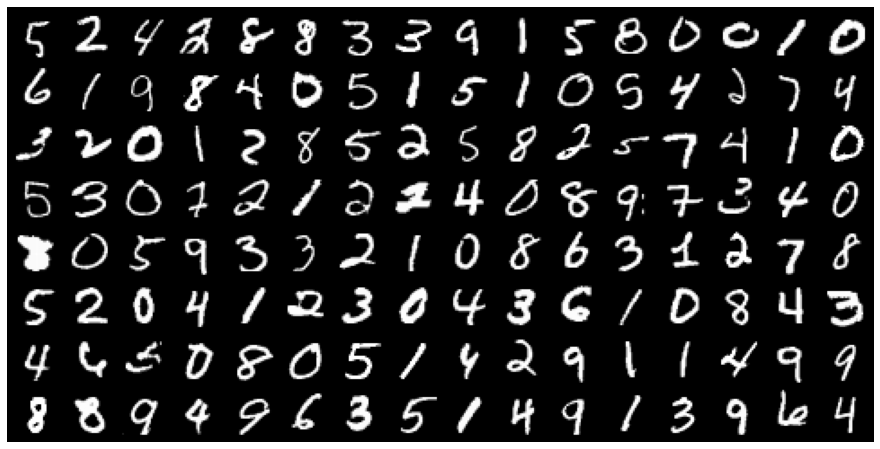

In [93]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [95]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [96]:
input_size = inputs.shape[-1]
hidden_size = 32
layer1 = nn.Linear(input_size, hidden_size)
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)


layer1_outputs = layer1(inputs)
relu_outputs = F.relu(layer1_outputs)
layer2_outputs = layer2(relu_outputs)

print(layer2_outputs.shape)

torch.Size([128, 10])


In [97]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.2807, grad_fn=<NllLossBackward>)

In [98]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [99]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [101]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [102]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [103]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.2829806804656982
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0806,  0.0509,  0.0248,  0.0527,  0.1005, -0.0288, -0.0143, -0.1239,
         -0.2039,  0.1802],
        [ 0.0684, -0.0223, -0.0303,  0.0550,  0.1995, -0.0663, -0.0870, -0.0436,
         -0.0862,  0.1302]])


In [105]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cuda')

In [106]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [107]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


In [108]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
    
# we define a DeviceDataLoader class to wrap our existing data loaders and move batches of 
# data to the selected device. Interestingly, we don't need to extend an existing class to 
# create a PyTorch datal oader. All we need is an __iter__ method to retrieve batches of 
# data and an __len__ method to get the number of batches.

In [109]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [110]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [111]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [112]:
history = [evaluate(model, val_loader)] 
history # initial run

[{'val_loss': 2.3009583950042725, 'val_acc': 0.10625000298023224}]

In [113]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2686, val_acc: 0.9217
Epoch [1], val_loss: 0.2022, val_acc: 0.9411
Epoch [2], val_loss: 0.1745, val_acc: 0.9526
Epoch [3], val_loss: 0.1499, val_acc: 0.9571
Epoch [4], val_loss: 0.1410, val_acc: 0.9590


In [114]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1302, val_acc: 0.9617
Epoch [1], val_loss: 0.1296, val_acc: 0.9616
Epoch [2], val_loss: 0.1254, val_acc: 0.9622
Epoch [3], val_loss: 0.1250, val_acc: 0.9624
Epoch [4], val_loss: 0.1272, val_acc: 0.9620


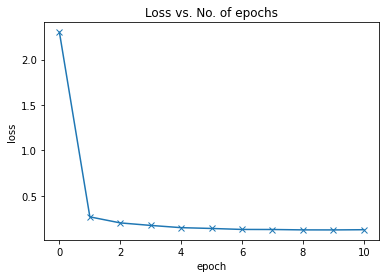

In [115]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

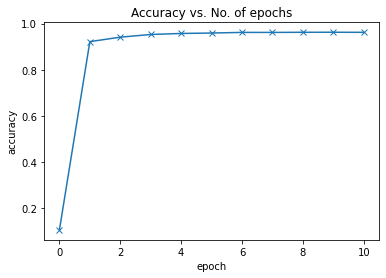

In [116]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');